# Causal Discovery from Observational Data - Group 1


## PC algorithm

In [ ]:
!pip install ges
!pip install castle
!pip install gcastle==1.0.3
import ges
import castle

In [ ]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

from collections import OrderedDict
import warnings

import numpy as np
import networkx as nx
import pandas as pd

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, ICALiNGAM, GOLEM

import matplotlib.pyplot as plt

In [ ]:
# Mute warnings - for the sake of presentation clarity
# Should be removed for real-life applications
warnings.simplefilter('ignore')

In [ ]:
# Loads data
df = pd.read_csv("a1_data.csv")

In [ ]:
df[-1:]

,A,B,C,D,E,F,G,H,I,J,K
11671,3.58636,2.832224,3.242749,3.792578,2.887171,2.085967,2.402463,3.789189,2.699285,0.730129,3.041706


In [ ]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_new = df[cols]
df_new.head()

list_name_new = []
for index,row in df_new.iteritems():
  list_name_new.append(index)
list_name_new

pc_dataset_new = df_new

# Build the model
pc_new = castle.algorithms.PC()
pc_new.learn(pc_dataset_new)

pc_new.causal_matrix

Tensor([[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

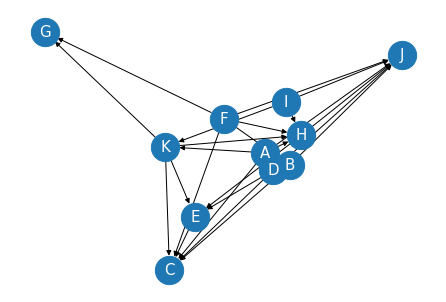

In [ ]:
# Get learned graph
learned_graph = nx.DiGraph(pc_new.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(len(list_name_new)), list_name_new)}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)

# Plot the graph
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=800,
    font_size=15,
    font_color='white'
)

In [ ]:
list_name = []
for index,row in df.iteritems():
  list_name.append(index)
list_name

In [ ]:
New_pc_dataset = 

In [ ]:
# To matrix
pc_dataset = df

In [ ]:
# Sanity check
pc_dataset, pc_dataset.shape

In [ ]:
# Build the model
pc = castle.algorithms.PC()
pc.learn(pc_dataset)

In [ ]:
pc.causal_matrix

Tensor([[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
np.sum(pc.causal_matrix,axis=1) # row out
np.sum(pc.causal_matrix,axis=0) # column in

Tensor([5, 2, 1, 3, 1, 5, 1, 3, 3, 0, 1])

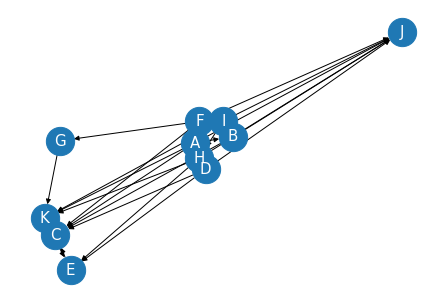

In [ ]:
# Get learned graph
learned_graph = nx.DiGraph(pc.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(len(list_name)), list_name)}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)

# Plot the graph
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=800,
    font_size=15,
    font_color='white'
)

## Gradient-based Optimization of dag-penalized Likelihood for learning linEar dag Models (GOLEM)

In [ ]:
GOLEM = castle.algorithms.GOLEM()
GOLEM.learn(pc_dataset)

In [ ]:
GOLEM.causal_matrix

##  ICA-Linear Non-Gaussian Acyclic Model(LiNGAM)

In [ ]:
ICALiNGAM = castle.algorithms.ICALiNGAM()
ICALiNGAM.learn(pc_dataset)

In [ ]:
ICALiNGAM.causal_matrix

Tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

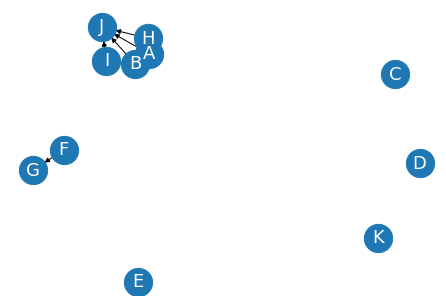

In [ ]:
# Get learned graph
learned_graph = nx.DiGraph(ICALiNGAM.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(len(list_name)), list_name)}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)

# Plot the graph
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=800,
    font_size=18,
    font_color='white'
)

## FCI 


In [ ]:
!pip install causal-learn
from causallearn.search.ConstraintBased.FCI import fci

In [ ]:
df_np = df.to_numpy()
fci(df_np)

In [ ]:
# or customized parameters
G, edges = fci(df_np)
# visualization
from causallearn.utils.GraphUtils import GraphUtils
pdy = GraphUtils.to_pydot(G, labels=list_name)
pdy.write_png('fci.png')


  0%|          | 0/11 [00:00<?, ?it/s]

X3 --> X1
X1 --> X10
X2 --> X3
X8 --> X9


## GES

In [ ]:
from causallearn.search.ScoreBased.GES import ges

In [ ]:
# default parameters
Record = ges(df_np)

In [ ]:
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io
pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
pyd.write_png('GES.png')

## Direct-LiNGAM

In [ ]:
!pip install lingam

In [ ]:
import graphviz
import lingam
from lingam.utils import make_dot

In [ ]:
model = lingam.DirectLiNGAM()
model.fit(df)

In [ ]:
# see the adjacency matrix as a result of the causal discovery.
model.adjacency_matrix_

In [ ]:
make_dot(model.adjacency_matrix_)
dot = make_dot(model.adjacency_matrix_)

# Save pdf
dot.render('direct')

# Save png
dot.format = 'png'
dot.render('direct|')

dot